In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting="soft"  # The best proba wins
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [3]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_test, y_test))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100, bootstrap=True)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.928

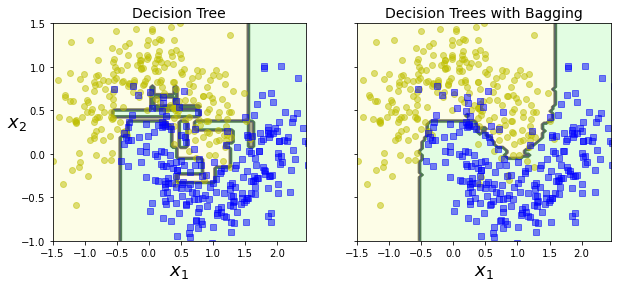

In [5]:
# Copied code for visualizing decision boundaries

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)


def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)


fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
# save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

In [6]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100, bootstrap=True,
                            oob_score=True)
bag_clf.fit(X_train, y_train)
print(bag_clf.score(X_test, y_test), bag_clf.oob_score_)

0.904 0.928


In [7]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

rnd_clf.score(X_test, y_test)

0.912

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris['target'])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [9]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R",
                             learning_rate=0.5)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.896

#### Gradient Boosting

In [10]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg_1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [12]:
y2 = y - tree_reg_1.predict(X)
tree_reg_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg_2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [13]:
y3 = y - tree_reg_1.predict(X)
tree_reg_3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg_3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [15]:
X_new = np.array([[0.8]])
y_preds = sum(tree.predict(X_new) for tree in (tree_reg_1, tree_reg_2, tree_reg_2))
y_preds

array([0.60839441])

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gb_reg.fit(X, y)
gb_reg.predict(X_new)

array([0.75026781])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gb_reg.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gb_reg.staged_predict(X_val)]
base_n_estimators = np.argmin(errors) + 1

gb_reg_best = GradientBoostingRegressor(max_depth=2, n_estimators=base_n_estimators, random_state=42)
gb_reg_best.fit(X_train, y_train)
mean_squared_error(y_val, gb_reg_best.predict(X_val))

0.002433323328926041

In [23]:
gb_reg_best.get_params()['n_estimators']

48

In [29]:
gb_reg = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
best_n_estimators = None

for n_estimators in range(1, 120):
    gb_reg.n_estimators = n_estimators
    gb_reg.fit(X_train, y_train)
    y_pred = gb_reg.predict(X_val)

    if (val_error := mean_squared_error(y_val, y_pred)) < min_val_error:
        min_val_error = val_error
        best_n_estimators = n_estimators
        error_going_up = 0

    else:
        error_going_up += 1
        if error_going_up >= 5:
            break  # early breaking

best_n_estimators

48

In [35]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
mean_squared_error(y_val, y_pred)

0.00386837827928473

In [36]:
# xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)
mean_squared_error(y_val, y_pred)

[0]	validation_0-rmse:0.21327
[1]	validation_0-rmse:0.15986
[2]	validation_0-rmse:0.12200
[3]	validation_0-rmse:0.09824
[4]	validation_0-rmse:0.08123
[5]	validation_0-rmse:0.07032
[6]	validation_0-rmse:0.06373
[7]	validation_0-rmse:0.06054
[8]	validation_0-rmse:0.05862
[9]	validation_0-rmse:0.05733
[10]	validation_0-rmse:0.05736
[11]	validation_0-rmse:0.05751


0.003286875809577923